
# Introduction to Seaborn
***
We got a good a glimpse of the data. But that's the thing with Data Science the more you get involved the harder is it for you to stop exploring.

Now, We want to **analyze** the data in order to extract some insights.We can use the Seaborn library for that.

We can use Seaborn to do both **Univariate and Multivariate analysis**. How? we will see soon.

## So what is Seaborn? (1/2)
***
Seaborn is a Python visualization library based on matplotlib. 

It provides a high-level interface for drawing attractive statistical graphics.

Some of the features that seaborn offers are : 

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data

## So what is Seaborn? (2/2)
***
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations


<div class="alert alert-block alert-success">**You can import Seaborn as below :**</div>

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Scikit-learn** 
---
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

 It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy.

Some popular groups of models provided by scikit-learn include:

**Clustering**: for grouping unlabeled data such as KMeans.
Cross Validation: for estimating the performance of supervised models on unseen data.

**Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.

**Dimensionality Reduction:** for reducing the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.

**Ensemble methods:** for combining the predictions of multiple supervised models.

**Feature extraction:** for defining attributes in image and text data.

**Feature selection:** for identifying meaningful attributes from which to create supervised models.

**Parameter Tuning:** for getting the most out of supervised models.

**Manifold Learning:** For summarizing and depicting complex multi-dimensional data.

**Supervised Models:** a vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.

## **Linear Regression for Machine Learning**

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

Before attempting to fit a linear model to observed data, a modeler should first determine whether or not there is a relationship between the variables of interest. This does not necessarily imply that one variable causes the other (for example, higher GATE scores do not cause higher college grades), but that there is some significant association between the two variables.

A linear regression line has an equation of the form **Y = a + bX**, where **X** is the explanatory variable and **Y** is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).



In [ ]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset
***

Let's start by loading the dataset. We'll be using two `.csv` files. One having only one predictor and the other having multiple predictors. Since the target variable(we'll find out what target variables and predictors are below) is **quantitative/continuous**, this is the best for regression problems. 

Let's start loading the data for univariate analysis.

In [ ]:
data = pd.read_csv("house_prices.csv")
data.info
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In order to learn to make predictions, it is important to learn what a Predictor is.

## So what is a predictor? 
***

How could you say if a person went to tier 1, 2 or 3 business college in India?
 
Simple, if someone is determined to pursue a MBA degree, Higher CAT scores (or GPA) leads to more college admissions! 

so CAT score here is known as predictors and the variable of interest is known as the target variable.

## Predictors & Target Variable for our dataset
*** 

Here, our target variable would be as mentioned above  ____________

** What could be the predictors for our target variable? **

Let's go with the **LotArea**

We would want to see if the price of a house is really affected by the area of the house

Intuitively, we all know the outcome but let's try to understand why we're doing this

## Plotting our data
***

  - Starting simple, let's just check how our data looks like in a scatter plot where: 
   - Area is taken along the X-axis
   - Price is taken along the Y-axis

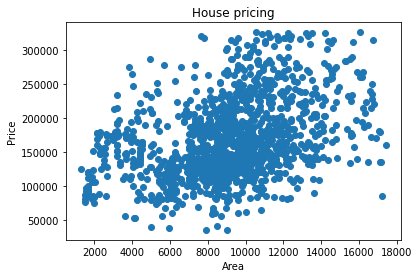

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['LotArea'], data['SalePrice'])
plt.title('House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

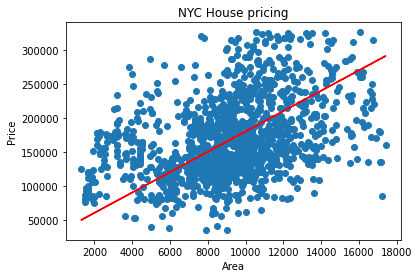

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Is there a relation ?
*** 

  - By seeing our plot above, we can see an upward trend in the House Prices as the Area of the house increases
  - We can say that as the Area of a house increases, it's price increases too.
<br/>  

Now, let's say we want to predict the price of the house whose area is 14000 sq feet, how should we go about it?

## Is there a relation ?
*** 

  - By seeing our plot above, we can see an upward trend in the House Prices as the Area of the house increases
  - We can say that as the Area of a house increases, it's price increases too.
<br/>  

Now, let's say we want to predict the price of the house whose area is 14000 sq feet, how should we go about it?

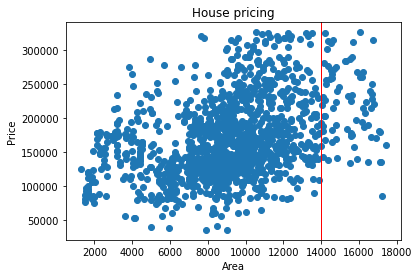

In [ ]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=14000,linewidth='1',color='r')
plt.title('House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Which line to choose?
***

As you saw, there are many lines which would seem to be fitting reasonably well.


consider following lines,


$$ price = 30000 + 15∗area\\
price=10000 + 17 ∗ area\\
price= 50000 + 12 ∗ area
$$

<div class="alert alert-block alert-success">**Let's try and plot them and see if they are a good fit**</div>

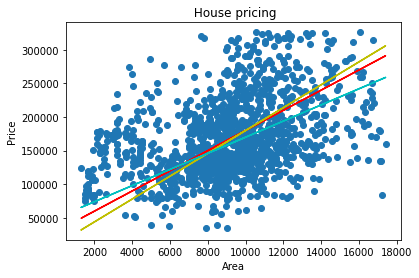

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.plot(data.LotArea, 10000 + 17*data.LotArea, "y-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "c-")
plt.title(' House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Which line to choose?
***
As you can see although all three seemed like a good fit, they are quite different from each other. And in the end, they will result in very different predictions.

For example, for house area = 9600, the predictions for red, black and yellow lines are

This function is defined as:

$$(Y_{pred}-Y_{actual})^2$$

The farther the points, more the the distance and more is the value of the function !


It is known as the **cost function** and since this function captures square of distance, it is known as the **least-squares cost function**. 


The idea is to **minimize** the cost function to get the best fitting line.

In [ ]:
# red line: 
print("red line:", 30000 + 15*9600) # <-- Inserted value 9600 inplace of LotArea 

# yellow line: 
print('yellow line:', 10000 + 17*9600) # <-- Inserted value 9600 inplace of LotArea

# cyan line:
print('cyan line:', 50000 + 12*9600) # <-- Inserted value 9600 inplace of LotArea


red line: 174000
yellow line: 173200
cyan line: 165200




## Which line to choose?
***

As you can see the price predictions are varying from each other significantly. So how do we choose the best line?

Well, we can define a function that measures how near or far the prediction is from the actual value.

If we consider the actual and predicted values as points in space, we can just calculate the distance between these two points!

This function is defined as:

$$(Y_{pred}-Y_{actual})^2$$

The farther the points, more the the distance and more is the value of the function !


It is known as the **cost function** and since this function captures square of distance, it is known as the **least-squares cost function**. 


The idea is to **minimize** the cost function to get the best fitting line.


## Introducing *Linear Regression* :
***

Linear regression using least squared cost function is known as **Ordinary Least Squared Linear Regression**. 

This allows us to analyze the relationship between two quantitative variables and derive some meaningful insights

## Notations !
***

We will start to use following notations as it helps us represent the problem in a concise way.

* $x^{(i)}$  denotes the predictor(s) - in our case it's the Area
* $y^{(i)}$  denotes the target variable (Price)

A pair ($x^{(i)}$ ,  $y^{(i)}$) is called a training example.

Let's consider that any given dataset contains **"m"** training examples or Observations

{ $x^{(i)}$  , $y^{(i)}$ ; i = 1, . . . , m} — is called a **training set**.

In this example, m = 1326 (Nos. of row)


For example, 2nd training example, ( x(2)  ,  y(2) ) corresponds to  **(9600,181500)**




## **Cost Function - Why is it needed ?**

*   An ideal case would be when all the individual points in the scatter plot fall directly on the line OR a straight line passes through all the points in our plot, but in reality, that rarely happens
*   We can see that for a Particular Area, there is a difference between Price given by our data point (which is the correct observation) and the line (predicted observation or Fitted Value)






So how can we Mathematically capture such differences and represent it?

### **Cost Function - Mathemtical Representation**
We choose θs so that predicted values are as close to the actual values as possible

We can define a mathematical function to capture the difference between the predicted and actual values.

This function is known as the cost function and denoted by J(θ)

$$J(θ) = \frac{1}{2m} \sum _{i=1}^m (h_\theta(X^{(i)})-Y^{(i)})^2$$


θ is the coefficient of 'x' for our linear model intuitively. It measures how much of a unit change of 'x' will have an effect on 'y'
Here, we need to figure out the values of intercept and coefficients so that the cost function is minimized.
 We do this by a very important and widely used Algorithm:  **Gradient Descent**

---
## **Optimizing using gradient descent**
---
- Gradient Descent is an iterative method that starts with some “initial random value” for θ, and that repeatedly changes θ to make J(θ) smaller, until hopefully it converges to a value of θ that minimizes J(θ)
- It repeatedly performs an update on θ as shown: 
 
$$ \theta_{j} := \theta_{j}-\alpha \frac{\partial }{\partial \theta_{j}}J(\theta) $$

 - Here α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J(θ)     
    

## Gradient Descent Algorithm
***
To get the optimal value of  θ , perform following algorithm known as the **Batch Gradient Descent Algorithm**

   - Assume initial θ
   - Calculate h(θ) for i=1 to m
   - Calculate J(θ). Stop when value of J(θ) assumes global/local minima
   - Calculate $\thinspace\sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))*x_{j}$   for all $\theta_{j}'s$
   - Calculate new $\thinspace\theta_{j}'s$
   - Go to step 2

## Linear Regression in `sklearn`
***

**`sklearn`** provides an easy api to fit a linear regression and predict values using linear regression

Let's see how it works

In [ ]:
X = data.LotArea[:,np.newaxis]  # Reshape
y = data.SalePrice
X


array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]])

In [ ]:
# Fitting Simple Linear Regression to the Training set


regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X)

## Plotting the Best Fitting Line

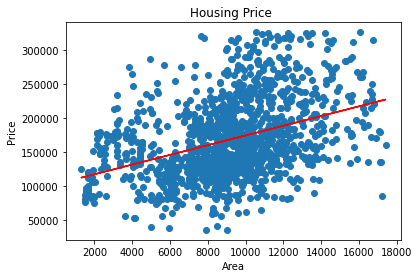

In [ ]:
# Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Prediction made Easy
***

 - Visually, now we now have a nice approximation of how Area affects the Price 
 - We can also make a prediction, the easy way of course! 
 - For example: If we want to buy a house of 14,000 sq. ft, we can simply draw a vertical line from 14,000 up to our Approximated Trend line and continue that line towards the y-axis

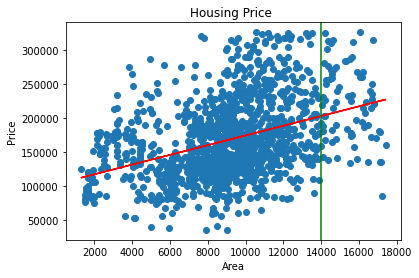

In [ ]:
# Train Part
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=14000,c='g');


 - We can see that for a house whose area ~ 14,000 we need to pay ~ 2,00,000-2,25,000

## Multivariate Linear Regression
***
- In Univariate Linear Regression we used only two variable. One as Dependent Variable and Other as Independent variable.
- Now, we will use Multiple Dependent variables instead of one and will predict the Price i.e. Independent variable.
- i.e the equation for multivariate linear regression is modified as below:
    
    $$ y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots +\theta_{n}x_{n} $$


- So, along with Area we will consider other variables as such as Pool etc.

In [ ]:
#Loading the data
NY_Housing = pd.read_csv("house_prices_multivariate.csv")
NY_Housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65,8450,7,5,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2008,208500
1,80,9600,6,8,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,2007,181500
2,68,11250,7,5,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,2008,223500
3,60,9550,7,5,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2006,140000
4,84,14260,8,5,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,2008,250000


In [ ]:
# making Independent and Dependent variables from the dataset
X = NY_Housing.iloc[:,:-1] # Selecting everything except the last column
y = NY_Housing.SalePrice   

In [ ]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("intercept:", regressor.intercept_) # This is the y-intercept 
print("coefficients of predictors:", regressor.coef_) # These are the weights or regression coefficients.

intercept: 310649.26008873095
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860421e-01 -6.61329855e-01  9.87201953e+00  1.96567898e+01
  1.31846867e+01 -4.66155080e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


## Predicting the price
***
Now let's say I want to predict the price of a house with following specifications.

In [ ]:
my_house = X.iloc[155]
my_house

LotFrontage          0
LotArea          16669
OverallQual          8
OverallCond          6
YearBuilt         1981
YearRemodAdd      1981
MasVnrArea         653
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF         1686
TotalBsmtSF       1686
1stFlrSF          1707
2ndFlrSF             0
LowQualFinSF         0
GrLivArea         1707
BsmtFullBath         0
BsmtHalfBath         0
FullBath             2
HalfBath             1
BedroomAbvGr         2
KitchenAbvGr         1
TotRmsAbvGrd         6
Fireplaces           1
GarageYrBlt       1981
GarageCars           2
GarageArea         511
WoodDeckSF         574
OpenPorchSF         64
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
YrSold            2006
Name: 155, dtype: int64

In [ ]:
pred_my_house = regressor.predict(my_house.values.reshape(1, -1))
print("predicted value:", pred_my_house[0])

predicted value: 264519.41857028136


In [ ]:
print("actual value:", y[155])

actual value: 228000


As you can see the predicted value is not very far away from the actual value.

Now let's try to predict the price for all the houses in the dataset.

In [ ]:
# Predicting the results
y_pred = regressor.predict(X)
y_pred[:10]

array([223165.24462329, 193708.14702761, 216394.79759077, 197356.62505514,
       295125.75398645, 172516.96207706, 269477.13355182, 245198.81455232,
       168787.92247657,  87185.78920275])

<div class="alert alert-block alert-success">Great! now, let's put the predicted values next to the actual values and see how good a job have we done!</div>

In [ ]:
prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
0,208500,223165.244623
1,181500,193708.147028
2,223500,216394.797591
3,140000,197356.625055
4,250000,295125.753986
5,143000,172516.962077
6,307000,269477.133552
7,200000,245198.814552
8,129900,168787.922477
9,118000,87185.789203


## Measuring the goodness of fit
***
Must say we have done a reasonably good job of predicting the house prices.

However, as the number of predictions increase it would be difficult to manually check the goodness of fit. In such a case, we can use the cost function to check the goodness of fit.

<div class="alert alert-block alert-success">Let's first start by finding the mean squared error (MSE)</div>


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)

1219044781.494744

<div class="alert alert-block alert-warning">**What do you think about the error value?**</div>

As you would notice the error value seems very high (in billions!). Why has it happened?

MSE is a relative measure of goodness of fit. We say that because the measure of goodness of MSE depends on the unit. 
As it turns out, Linear regression depends on certain underlying assumptions. Violation of these assumptions outputs poor results.

Hence, it would be a good idea to understand these assumptions.



## Assumptions in Linear Regression
***

There are some key assumptions that are made whilst dealing with Linear Regression

These are pretty intuitive and very essential to understand as they play an important role in finding out some relationships in our dataset too! 

Let's discuss these assumptions, their importance and mainly **how we validate these assumptions**! 

### Assumption - 1
***
1) **Linear Relationship Assumption: **

Relationship between response (Dependent Variables) and feature variables (Independent Variables) should be linear.

 - **Why it is important:**

<div class="alert alert-block alert-info">Linear regression only captures the linear relationship, as it's trying to fit a linear model to the data.</div>



 - **How do we validate it:**

<div class="alert alert-block alert-success">The linearity assumption can be tested using scatter plots.</div>


### Assumption - 2
***
2) **Little or No Multicollinearity Assumption:**

It is assumed that there is little or no multicollinearity in the data.

 - **Why it is important:**

<div class="alert alert-block alert-info">It results in unstable parameter estimates which makes it very difficult to assess the effect of independent variables.</div>


 - **How to validate it:**

Multicollinearity occurs when the features (or independent variables) are not independent from each other. <div class="alert alert-block alert-success">Pair plots of features help validate.</div>



### Assumption - 3
***
3) **Homoscedasticity Assumption: **

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. 

 - **Why it is important:**

<div class="alert alert-block alert-info">Generally, non-constant variance arises in presence of outliers or extreme leverage values.</div>


 - **How to validate:**

<div class="alert alert-block alert-success">Plot between  dependent variable vs error
.</div>


***
In an ideal plot the variance around the regression line is the same for all values of the predictor variable.
In this plot we can see that the variance around our regression line is nearly the same and hence it satisfies the condition of homoscedasticity.
![slide%2055.png](attachment:slide%2055.png)
<br/><br/>
Image Source : https://en.wikipedia.org/wiki/Homoscedasticity

### Assumption - 4
***

4) **Little or No autocorrelation in residuals:**

There should be little or no autocorrelation in the data. 

Autocorrelation occurs when the residual errors are not independent from each other.

- **Why it is important:**

<div class="alert alert-block alert-info">The presence of correlation in error terms drastically reduces model's accuracy. 

This usually occurs in time series models. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.</div>


 - **How to validate:**
<div class="alert alert-block alert-success">Residual vs time plot. look for the seasonal or correlated pattern in residual values.</div>


### Assumption - 5
***

5) **Normal Distribution of error terms**

 - **Why it is important:**
 
<div class="alert alert-block alert-info">Due to the Central Limit Theorem, we may assume that there are lots of underlying facts affecting the process and the sum of these individual errors will tend to behave like in a zero mean normal distribution. In practice, it seems to be so.
</div>

 - **How to validate:**
<div class="alert alert-block alert-success">You can look at QQ plot
</div>